# MemoLab Beer Data Analysis

## First we load the libraries

In [55]:
# import pkgs
import numpy as np
import pandas as pd
import seaborn as sns
import hypertools as hyp

%matplotlib inline
import warnings; warnings.simplefilter('ignore')

## Now load in the data 
### Let's take a quick look

In [49]:
beers = pd.read_csv('beer_ratings.csv', index_col='Taster')
print(beers.head())

                              Beer  Can Appearance  Beer Appearance  Aroma  \
Taster                                                                       
Adam      Anderson Valley G&T Gose               8                6      8   
Adam    Jack's Abbey Copper Legend               7                7      6   
Adam     Lamplighter Rabbit Rabbit               8                4      7   
Adam          Shipyard Pumpkinhead               6                9      3   
Adam      Maui Coconut Hiwa Porter               7                3      3   

        Mouth Feel  Taste  Overall  
Taster                              
Adam             5      5        6  
Adam             7      5        5  
Adam             6      3        4  
Adam             7      7        7  
Adam             6      2        3  


### We tried these beers:

In [50]:
print(np.unique(beers["Beer"]))

['Anderson Valley G&T Gose' 'Dogfish Head 60 Minute IPA'
 'Dogfish Head Flesh & Blood IPA' 'Dogfish Head Romantic Chemistry'
 'Harpoon Flannel Friday' "Jack's Abbey Copper Legend"
 'Kentucky Bourbon Barrel Stout' 'Lamplighter Rabbit Rabbit'
 'Maui Coconut Hiwa Porter' 'Shiner Ruby Redbird' 'Shipyard Pumpkinhead'
 'Tank 7 Farmhouse Ale']


### And we rated them on each of these attributes:

In [51]:
print(list(beers.columns[1:(len(beers.columns))]))

['Can Appearance', 'Beer Appearance', 'Aroma', 'Mouth Feel', 'Taste', 'Overall']


## Let's get to the good stuff first...BEERSPACE. 
### How do all of the lab members' tastes in beer relate to each other in beer space?

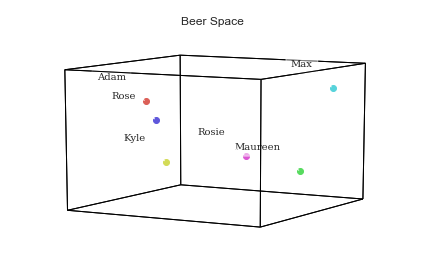

In [57]:
# load wide data
wide_beers = pd.read_csv('beer_ratings_wide.csv', index_col='Taster')
small_beers = wide_beers[wide_beers.index != 'Dan'] 
#Dan didn't rate all of the beers...dang it Dan, I'll try to fill in his missing data with hypertools soon

# plot
hue = small_beers.index
plot = hyp.plot(small_beers, 'o', hue=hue, labels=list(hue), title='Beer Space') # plots dots

### We can take a closer look at who has the most similar beer drinker preferences in a correlation matrix

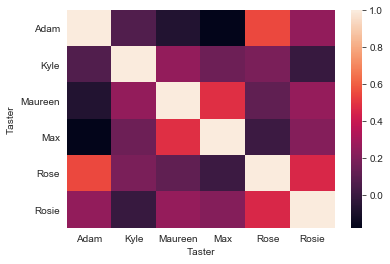

In [86]:
sns.heatmap(small_beers.T.corr())

## Now let's take a closer look at the beers compared to each other
### First transform the data into long format and add beer nicknames for easier plotting

In [80]:
# transform to long format
beers["Taster"] = beers.index
beers_clean = beers.reset_index(drop=True)
beers_long = pd.melt(beers_clean, id_vars=['Taster','Beer'], value_vars = beers.columns[1:(len(beers.columns)-1)], var_name = 'Attribute', value_name = 'Rating')           


# replace long beer names w/ shorter ones
beernames = np.unique(beers_long["Beer"])
akas = ['G&T Gose','60 Minute','Flesh & Blood','Romantic Chem','Flannel Friday','Copper Legend',
        'Barrel Stout','Rabbit Rabbit','Hiwa Porter','Redbird','Pumpkinhead','Farmhouse Ale']
beer_akas = pd.DataFrame({'Name' : beernames,
                          'Nickname' : akas})
beers_long['Beer'] = beers_long.apply(lambda x: (beer_akas.Nickname[list(beer_akas.Name).index(x['Beer'])]), axis=1)

# take a look
print(beers_long.head())

  Taster           Beer       Attribute  Rating
0   Adam       G&T Gose  Can Appearance       8
1   Adam  Copper Legend  Can Appearance       7
2   Adam  Rabbit Rabbit  Can Appearance       8
3   Adam    Pumpkinhead  Can Appearance       6
4   Adam    Hiwa Porter  Can Appearance       7


### Average beer rating across all dimensions

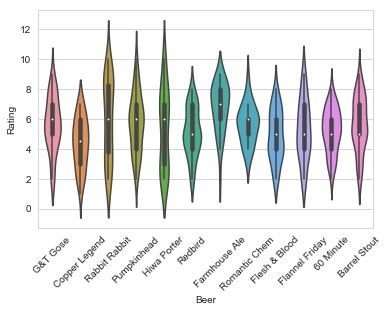

In [85]:
g = sns.violinplot(data=beers_long,x='Beer',y='Rating')
for item in g.get_xticklabels():
    item.set_rotation(45)

### Can Appearance